In [1]:
import pandas as pd

In [2]:
cd full_data_cleaned copy

/Users/valencialie/Desktop/Omdena/full_data_cleaned copy


In [3]:
v2 = pd.read_csv("news_articles_cleanedv2.csv")
v3 = pd.read_csv("news_articles_cleanedv3.csv")
v4 = pd.read_csv("news_articles_cleanedv4.csv")
v5 = pd.read_csv("news_articles_cleanedv5.csv")
v1 = pd.read_csv("News_Articles_Data.csv")

In [4]:
news = pd.concat([v2,v1,v3,v4,v5], axis = 0).drop_duplicates(subset=['url'], keep = "first").drop('Unnamed: 0', axis = 1)

In [5]:
news

,title,url,tags,date,content,covid,singapore,news_source
0,'It took months to see the end of the tunnel':...,https://www.asiaone.com/lifestyle/it-took-mont...,NIL,"June 05, 2021",When she first started gymnastics at the age o...,False,True,Asia One
1,'Everyone watching makes me feel uneasy': Stud...,https://www.asiaone.com/singapore/everyone-wat...,NIL,"June 01, 2021","These days, Natasha Osman would sit in front o...",False,True,Asia One
2,Singapore Mental Health Film Festival 2021 ret...,https://www.asiaone.com/lifestyle/singapore-me...,NIL,"May 18, 2021",The Covid-19 pandemic has heightened concerns ...,True,True,Asia One
3,"Woman, 19, rescued after sitting on 27th-floor...",https://www.asiaone.com/singapore/woman-19-res...,NIL,"April 09, 2021",Residents in Sengkang craned their necks as th...,False,True,Asia One
4,'I wanted to push the aircon out and jump down...,https://www.asiaone.com/lifestyle/i-wanted-pus...,NIL,"January 09, 2021",In his 30s and at the peak of his life and car...,False,True,Asia One
...,...,...,...,...,...,...,...,...
640,Adulting 101: Love retail therapy want to cont...,https://admin.todayonline.com/singapore/adulti...,NIL,10/4/2021,Adulthood is an invigorating stage of life as ...,True,NaN,Today Online
803,FairPrice Group launches meeting-free Friday a...,https://admin.todayonline.com/singapore/fairpr...,NIL,14/8/2020,SINGAPORE â€” In a move to give its employees ...,True,NaN,Today Online
830,"Seafarers rejected at ports, stranded at sea, ...",https://admin.todayonline.com/singapore/seafar...,NIL,13/6/2020,SINGAPORE â€” He had been out at sea for four ...,True,NaN,Today Online
949,Covid-19: All senior-centric activities by gov...,http://todayonline.prod.acquia-sites.com/singa...,NIL,10/3/2020,SINGAPORE â€” All senior-centric activities co...,True,NaN,Today Online


In [6]:
news['content'] = news.content.str.replace("â€”", "")

# General Vader Sentiment Analysis

In [7]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [8]:
news['negativity'] = ''

In [9]:
news['positivity'] = ''

In [10]:
news['neutral'] = ''

In [11]:
news['compound'] = ''

In [12]:
news['negativity'] = news['content'].apply(lambda x:analyser.polarity_scores(str(x))['neg'])
news['positivity'] = news['content'].apply(lambda x:analyser.polarity_scores(str(x))['pos'])
news['neutral'] = news['content'].apply(lambda x:analyser.polarity_scores(str(x))['neu'])
news['compound'] = news['content'].apply(lambda x:analyser.polarity_scores(str(x))['compound'])


## Analysis of the sentiment analysis in relation to Covid-19

But first, before we make a fair comparison, we need to sift through all covid-related articles that contain mental-health related issues (instead of just general covid related article). Then, we can compare the sentiments of those articles with mental-health related articles but not covid related/caused. This way, we can tell whether covid worsens mental health or not based on the sentiments written in the articles. Though, of course this is subjected to how the article is written as well. The articles are also written from a third POV and not the person experiencing it, so the sentiments harboured by the author may be different with those who are involved in the matter directly.

But, the reasoning behind the use of sentiment analysis is trying to see whether covid & mental health-related news harbour more negative sentiments within its words used than non-covid & mental health-related news.


In [13]:
mental = ["depression", "mental illness","killed",
"social anxiety","loneliness","stress","lonely",
"isolation", "suicide","abuse","death", "post traumatic stress disorder",
"no motivation", "therapy", "trauma", "counselling" , "mood disorder",
"mood swings", "mental health", "angst", "emotion", "phobia",
"addiction", "self-harm", "neurosis", "abuse", 
"disorder", "died","tired", "trapped", 
"paranoia", "overwhelmed", "irritable", "bipolar", 
"psychologist", "well-being", "imh", "sos", "counsellor", "insomnia", "drugs", "self-esteem", "depressed"]


In [14]:
from nltk import tokenize

news['split_sentence'] = news.content.apply(lambda x: tokenize.sent_tokenize(str(x)))

In [15]:
news.content = news.content.str.lower()

In [16]:
list1 = []

In [17]:
news = news.reset_index().drop('index', axis = 1)

In [18]:
covidnews = news[news.covid == True]
noncovidnews = news[news.covid == False]

In [19]:
covidnews = covidnews.reset_index().drop('index', axis = 1)
noncovidnews = noncovidnews.reset_index().drop('index', axis = 1)

In [20]:
for i in range(0, 732):
    for word in mental:
        for a in range(0, len(covidnews.split_sentence[i])):
            if word in covidnews.split_sentence[i][a]:
                list1.append(i)

In [21]:
list2=[]
for i in range(0, 244):
    for word in mental:
        for a in range(0, len(noncovidnews.split_sentence[i])):
            if word in noncovidnews.split_sentence[i][a]:
                list2.append(i)

In [22]:
list1 = list(dict.fromkeys(list1))
list2 = list(dict.fromkeys(list2))

In [23]:
len(list1)

665

In [24]:
len(list2)

223

In [25]:
for a in range(0, 732):
    if a not in list1:
        covidnews= covidnews.drop(a)

In [26]:
covidnews = covidnews.reset_index().drop('index', axis = 1)

In [27]:
for a in range(0, 244):
    if a not in list2:
        noncovidnews= noncovidnews.drop(a)

In [28]:
noncovidnews = noncovidnews.reset_index().drop('index', axis = 1)

To make the analysis fair, we can upsample the minority class, which is when covid is not mentioned in the news article.

In [29]:
from sklearn.utils import resample

In [30]:
noncovidnews_upsampled = resample(noncovidnews, 
                                 replace=True,     
                                 n_samples=665,
                                 random_state=10)

news_upsampled = pd.concat([covidnews, noncovidnews_upsampled])
news_upsampled.covid.value_counts()

True     665
False    665
Name: covid, dtype: int64

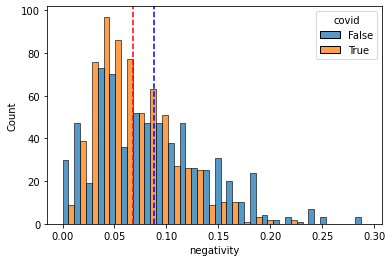

In [31]:
import seaborn as sns
from matplotlib import pyplot as plt

false_covid = news_upsampled[news_upsampled.covid ==False]
true_covid = news_upsampled[news_upsampled.covid ==True]

average_false = false_covid.negativity.mean()
average_true = true_covid.negativity.mean()

ax = sns.histplot(news_upsampled, x = "negativity", hue = "covid", multiple = "dodge")

plt.axvline(average_false, color='b', linestyle='--')
plt.axvline(average_true, color='r', linestyle='--')


From this, we can tell that the distribution between the two is fairly similar even though there seems to be more posts with highly negative tones (according to Vader) when covid is not mentioned in the news article. The average of negativity when covid is not mentioned is also higher than when it is mentioned.

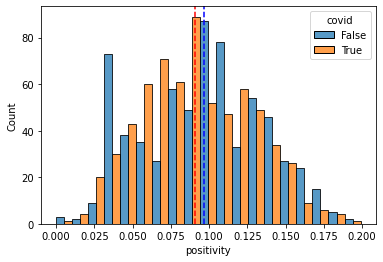

In [32]:
false_covid = news_upsampled[news_upsampled.covid ==False]
true_covid = news_upsampled[news_upsampled.covid ==True]

average_false = false_covid.positivity.mean()
average_true = true_covid.positivity.mean()

ax = sns.histplot(news_upsampled, x = "positivity", hue = "covid", multiple = "dodge")

plt.axvline(average_false, color='b', linestyle='--')
plt.axvline(average_true, color='r', linestyle='--')

However, on the flip side, the average of positive tones in a news article that did not mention covid is also higher compared to when it mentioned covid. Thus, this finding is slightly contradicting with the previous finding.

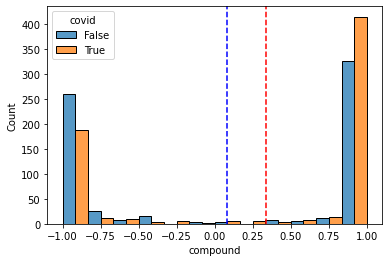

In [33]:
false_covid = news_upsampled[news_upsampled.covid ==False]
true_covid = news_upsampled[news_upsampled.covid ==True]

average_false = false_covid.compound.mean()
average_true = true_covid.compound.mean()

ax = sns.histplot(news_upsampled, x = "compound", hue = "covid", multiple = "dodge")

plt.axvline(average_false, color='b', linestyle='--')
plt.axvline(average_true, color='r', linestyle='--')

After taking both into account, we found out that overall news articles that mentioned covid has a higher compound score compared to when news articles do not mention covid, though it is critical to take note that the compound score indicates it to be almost neutral. This may be because news articles are generally written in an objective manner, that may or may not cause the sentiments to be generally neutral. In addition, because we use the whole article, the effect of some negative words can be negated by positive words, that may or may not be directly related to mental health or covid.

Hence, we need to continue investigating because this may only mean correlation and not causation and we may not know whether covid actually cause mental health to be worse or not. Furthermore, there may be discrepancies since I use VADER to do the sentiment analysis and we have no idea how accurate the sentiment scores calculated is.

To further check, we can try to use another sentiment analysis tool, TextBlob just to see if our finding is consistent.

# TextBlob Sentiment Analysis

In [34]:
from textblob import TextBlob

In [35]:
news_upsampled['polarity'] = news_upsampled['content'].apply(lambda x:TextBlob(str(x)).sentiment[0])
news_upsampled['subjectivity'] = news_upsampled['content'].apply(lambda x:TextBlob(str(x)).sentiment[1])


In [36]:
news_upsampled

,title,url,tags,date,content,covid,singapore,news_source,negativity,positivity,neutral,compound,split_sentence,polarity,subjectivity
0,Singapore Mental Health Film Festival 2021 ret...,https://www.asiaone.com/lifestyle/singapore-me...,NIL,"May 18, 2021",the covid-19 pandemic has heightened concerns ...,True,True,Asia One,0.069,0.080,0.851,0.5484,[The Covid-19 pandemic has heightened concerns...,0.040348,0.307868
1,'Right to disconnect' from work should be cons...,https://www.asiaone.com/singapore/right-discon...,NIL,"September 01, 2020",working from home has become a new norm for ma...,True,True,Asia One,0.103,0.079,0.817,-0.8588,[Working from home has become a new norm for m...,0.071753,0.356836
2,"Employer faces $72,000 hospital bill after mai...",https://www.asiaone.com/singapore/employer-fac...,NIL,"August 24, 2020","[update: aug 26] the employer's son, goh meng ...",True,True,Asia One,0.035,0.046,0.919,0.8057,"[[UPDATE: Aug 26] The employer's son, Goh Meng...",-0.023416,0.290771
3,Domestic worker jumps from Toa Payoh flat afte...,https://www.asiaone.com/singapore/domestic-wor...,NIL,"August 20, 2020",a domestic helper from myanmar jumped from the...,True,True,Asia One,0.090,0.080,0.830,-0.7604,[A domestic helper from Myanmar jumped from th...,0.020190,0.290833
4,Singaporeans working from home more stressed t...,https://www.asiaone.com/lifestyle/singaporeans...,NIL,"August 19, 2020",if there's one thing that many of us�can�agree...,True,True,Asia One,0.049,0.063,0.887,0.8751,[If there's one thing that many of us�can�agre...,0.140052,0.423946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,IN FOCUS: From ‘devastated’ land to many long ...,https://www.channelnewsasia.com/news/singapore...,"['Hiking', 'Nature', 'NParks']",10-Apr-21,"while the hiking scene is thriving today, such...",False,True,Channel News Asia,0.043,0.117,0.840,0.9996,"[While the hiking scene is thriving today, suc...",0.127024,0.463185
146,"Man, 76, apprehended under the mental health a...",https://mothership.sg/2021/02/man-lock-himself...,NIL,"February 12, 2021",the police has apprehended a 76-year-old man ...,False,True,Mothership,0.084,0.051,0.865,-0.9231,[ The police has apprehended a 76-year-old man...,-0.093333,0.421667
19,Schools to offer mental health lessons from 20...,https://www.channelnewsasia.com/news/singapore...,"['Budget 2020', 'Parliament', 'mental health',...",4 March 2020,singapore: mental wellness and peer support wi...,False,True,Channel News Asia,0.006,0.109,0.886,0.9975,[SINGAPORE: Mental wellness and peer support w...,0.143352,0.449110
206,Bangladeshi worker sentenced to death for murd...,https://www.channelnewsasia.com/news/singapore...,"['court', 'crime', 'trials', 'murder']",14/12/2020,singapore: a bangladeshi worker was sentenced ...,False,NaN,CNA,0.124,0.039,0.838,-0.9876,[SINGAPORE: A Bangladeshi worker was sentenced...,0.051442,0.301222


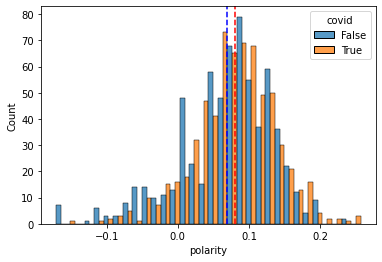

In [37]:
false_covid = news_upsampled[news_upsampled.covid ==False]
true_covid = news_upsampled[news_upsampled.covid ==True]

average_false = false_covid.polarity.mean()
average_true = true_covid.polarity.mean()

average_false = false_covid.polarity.mean()
average_true = true_covid.polarity.mean()

ax = sns.histplot(news_upsampled, x = "polarity", hue = "covid", multiple = "dodge")

plt.axvline(average_false, color='b', linestyle='--')
plt.axvline(average_true, color='r', linestyle='--')

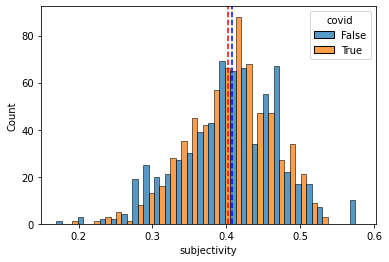

In [38]:
false_covid = news_upsampled[news_upsampled.covid ==False]
true_covid = news_upsampled[news_upsampled.covid ==True]

average_false = false_covid.subjectivity.mean()
average_true = true_covid.subjectivity.mean()

average_false = false_covid.subjectivity.mean()
average_true = true_covid.subjectivity.mean()

ax = sns.histplot(news_upsampled, x = "subjectivity", hue = "covid", multiple = "dodge")

plt.axvline(average_false, color='b', linestyle='--')
plt.axvline(average_true, color='r', linestyle='--')

Based on the analysis, both Vader and TextBlob produced similar results in which positive sentiments are found more in non-covid related news articles. The mean subjectivity of both covid-related and non-covid related news articles hover at about the same level of 0.4.

However, there are issues with this kind of approach. First, because we use TextBlob and Vader Sentiment Analysis that does not work very well with large chunks of text, the polarity may not be very accurate. This is because everytime Vader/TextBlob finds a negative word, it negates the positivity in the text, and since the text has a lot of words, it may not capture the essence of the text and instead just take it as a whole, without dissecting the more important lines from the less important ones.

Because of that, we may need to employ a different kind of approach.

# Splitting by sentences

One way for us to make better analysis is to find sentences that contain either the keywords of mental health problem or covid and analyse them individually.

In [39]:
mental = ["depression", "mental illness","killed",
"social anxiety","loneliness","stress","lonely",
"isolation", "suicide","abuse","death", "post traumatic stress disorder",
"no motivation", "therapy", "trauma", "counselling" , "mood disorder",
"mood swings", "mental health", "angst", "emotion", "phobia",
"addiction", "self-harm", "neurosis", "abuse", 
"disorder", "died","tired", "trapped", 
"paranoia", "overwhelmed", "irritable", "bipolar", 
"psychologist", "well-being", "imh", "sos", "counsellor", "insomnia", "drugs", "self-esteem", "depressed"]


In [40]:
list1 = []
temp = []

In [41]:
news_upsampled = news_upsampled.reset_index().drop('index', 1)

In [42]:
for i in range(0, 1330):
    for word in mental:
        for a in range(0, len(news_upsampled.split_sentence[i])):
            if word in news_upsampled.split_sentence[i][a]:
                list1.append(i)
                list1.append(news_upsampled.split_sentence[i][a])
                temp.append(list1)
                list1 = []
                
            

In [43]:
news_upsampled['selected_sentence'] = ''

In [44]:
initial = 0
list1 = []

In [45]:
for i in range(0,len(temp)):
    if initial == temp[i][0]:
        list1.append(temp[i][1])
    else:
        news_upsampled['selected_sentence'][initial] = list1
        list1 = []
        initial = temp[i][0]
        list1.append(temp[i][1])
    

<ipython-input-45-6b1683630318>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_upsampled['selected_sentence'][initial] = list1


In [46]:
news_upsampled['frequency'] = ''

In [47]:
for i in range(0, 1330):
    news_upsampled.frequency[i] = len(news_upsampled.selected_sentence[i])

<ipython-input-47-21b5d23a6a5d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_upsampled.frequency[i] = len(news_upsampled.selected_sentence[i])


## Based on Average Frequency of mental health related words in an article (whether covid or non covid related)

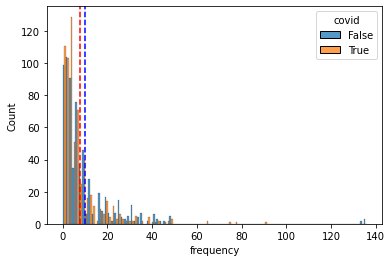

In [48]:
false_covid = news_upsampled[news_upsampled.covid ==False]
true_covid = news_upsampled[news_upsampled.covid ==True]

avgfalse = news_upsampled[news_upsampled.covid == False].frequency.sum()/len(news_upsampled[news_upsampled.covid == False])
avgtrue = news_upsampled[news_upsampled.covid == True].frequency.sum()/len(news_upsampled[news_upsampled.covid == True])


ax = sns.histplot(news_upsampled, x = "frequency", hue = "covid", multiple = "dodge")

plt.axvline(avgfalse, color='b', linestyle='--')
plt.axvline(avgtrue, color='r', linestyle='--')

Based on the average frequency of sentences that has the mental health related words inside each article, the news article that mentioned covid too has lesser mental health related words than those that do not mention covid. On hindsight, this is accurate because when an article is solely discussing about someone's experience on mental health, without bringing covid in, the author may use more descriptive language in describing the victim's ordeal and not just inform us about how covid has worsen people's mental health.

## Based on individual sentences